# Introduction to Scikit-Learn

[Scikit-Learn](https://scikit-learn.org/stable/) is one of the best known Python libraries that provides implementations of a range of machine learning algorithms. Built on NumPy, SciPy, and matplotlib, the package provides a clean, uniform, and streamlined API. In this section, we'll be providing an overview of the Scikit-Learn API.

## Data Representation in Scikit-Learn

Machine learning is all about creating models from data. But what is this data and how is it usually presented? Within Scikit-Learn, the best way to think of data is in terms of tables of data.

### Data as table

A table is a two-dimensional grid of data, in which each row represent individual elements of the dataset, and the columns represent their respective features. For example, consider the Iris dataset:

In [1]:
%matplotlib inline
import seaborn as sns
sns.set()

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Each row of the data refers to a single observed flower. In general, the rows of the matrix are referred as _samples_, and the number of rows as `n_samples`.

Each column of the data refers to a particular piece of information that describes each sample. In general, the columns of the matrix are referred as _features_, and the number of columns as `n_features`.

### Features matrix

This table layout makes clear that the information can be thought of as a two-dimensional array or matrix, which we will call the _features matrix_. By convention, this feature matrix is often stored in a variable named `X` and is assumed to be two-dimensional, with shape `[n_samples,n_features]`. It is most often contained in a NumPy array or a Pandas `DataFrame`.

The samples (i.e., rows) always refer to the individual objects described by the dataset. The features (i.e., columns) always refer to the distinct observations that describe each sample.

### Target array

Under a supervised learning context, in addition to the feature matrix `X`, we also work with a _label_ or _target_ array, which by convention is usually called `y`. The target array is usually one-dimensional, with length `n_samples`, and is generally contained in a NumPy array or Pandas `Series`. The target array may have continuous numerical values, or discrete classes/labels.

Its worth pointing out that the difference between the features and the target is that the latter is usually the quantity we want to predict from the data: in statistical terms, it is the dependent variable.

With the target array in mind, we can use Seaborn to conveniently visualize the data:

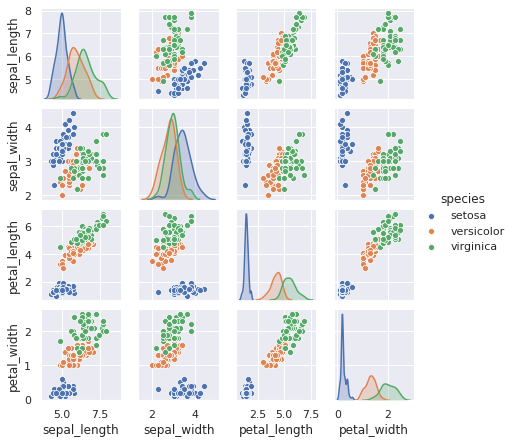

In [2]:
sns.pairplot(iris, hue='species', height=1.5);

For use in Scikit-Learn, we will extract the features matrix and target array from the `DataFrame`:

In [3]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']
y_iris.shape

(150,)

## Scikit-Learn's Estimator API

The Scikit-Learn API is designed with the following guiding principles in mind, as outlined in the [Scikit-Learn API paper](https://arxiv.org/abs/1309.0238):

- _Consistency_: All objects share a common interface drawn from a limited set of methods, with consistent documentation.
- _Inspection_: All specified parameter values are exposed as public attributes.
- _Limited object hierarchy_: Only algorithms are represented by Python classes; datasets are represented in standard formats (e.g. NumPy arrays) and parameter names use standard Python strings.
- _Composition_: Many machine learning tasks can be expressed as sequences of more fundamental algorithms, and Scikit-Learn makes use of this wherever possible.
- _Sensible defaults_: When models require user-specified parameters, the library defines an appropriate default value.

Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications.

### Basics of the API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows:

1. Choose a class of model and import the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating the class with desired values.
3. Prepare and arrange data into a features matrix and target vector as per the discussion above.
4. Fit the model to the data by calling the `fit()` method of the model instance.
5. Apply the model to new data:
 - For supervised learning, often we predict labels for unknown data using the `predict()` method.
 - For unsupervised learning, we often transform or infer properties of the data using the `transform()` or `predict()` method.

### Supervised learning example: Simple linear regression

Let's consider a simple linear regression as an example of this process. We will use the following data:

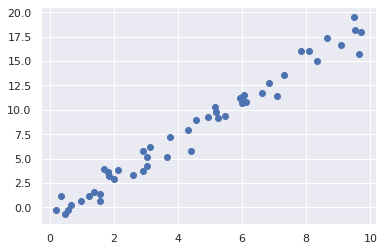

In [5]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

#### 1. Choose a class of model

In Scikit-Learn, every class of model is represented by a Python class. To compute a linear regression, we can import the linear regression class:

In [6]:
from sklearn.linear_model import LinearRegression

Note that other more general linear regression models exist as well.

#### 2. Choose model hyperparameters

After we have decided what model we are going to use, we still have some choices to make. Consider the following questions:

- Would we like to fit for the offset (i.e., y-intercept)?
- Would we like the model to be normalized?
- Would we like to preprocess the features to add model flexibility?
- What degree of regularization would we like to use in our model?
- How many model components would we like to use?

There are examples of the important choices we must make once the model class is selected. These choices are often represented as _hyperparameters_, or parameters that must be set before the model is fit to data.

For our linear regression example, we can specify that we would like to fit the intercept using the `fit_intercept` hyperparameter:

In [7]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 3. Arrange data into a features matrix and target vector

Previously we stated that the Scikit-Learn data representation requires a two-dimensional features matrix and a one dimensional target array. The target variable `y` is already in the correct form (a array of length `n_samples`), but the data `x` still needs to be in the form of a matrix of size `[n_samples, n_features]` (it is currently an array of length `n_samples`:

In [8]:
X = x[:, np.newaxis]
X.shape

(50, 1)

#### 4. Fit the model to the data

Now we can apply our model to data. This can be done with the `fit()` method of the model:

In [9]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The `fit()` method causes a number of computations to take place, and the results are stored in model-specific attributes that we can explore. By convention, all model parameters that were learned during the `fit()` process have trailing underscores:

In [10]:
model.coef_

array([1.9776566])

In [11]:
model.intercept_

-0.9033107255311146

These two parameters represent the slope and intercept of the linear fit to the data. We can verify that the results are very close to the input slope of 2 and intercept of -1.

#### 5. Predict labels for unknown data

With the model trained, we can evaluate it based on what it says about new data (data that was not part of the training set). In Scikit-Learn, this can be done using the `predict()` method. Our new data will be a grid of _x_ values, and we will ask what _y_ values the model predicts:

In [12]:
xfit = np.linspace(-1, 11)

Once again, we need to reshape the input data to be a two-dimensional matrix:

In [13]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

Finally, we can visualize the results by plotting the raw data and the model fit:

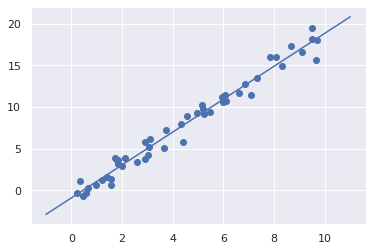

In [14]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

Usually the efficacy of the model is evaluated by comparing its results to some known baseline.

### Supervised learning example: Iris classification

Let's take a look at another example of this process using the Iris dataset. The quest we want to answer is: given a model trained on a portion of the Iris dataset, how well can we predict the remaining labels?

For this task, we will use a simple generative model known as Gaussian Naive Bayes, which assumes that each class is drawn from an axis-aligned Gaussian distribution. Because it is so fast and has no hyperparameters to choose, Gaussian Naive Bayes, is often a good model to use as a baseline classification.

Since we would like to evaluate the model in data it has not seen before, we will split the data into a _training set_ and a _testing set_. The Scikit-Learn provided the very convenient `train_test_split` utility function for that purpose:

In [15]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

With the data arranged, we can follow our recipe to predict the labels:

In [16]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

We can evaluate the efficacy of the model by using the `accuracy_score` to see the fraction of predicted labels that match their true value:

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### Unsupervised learning example: Iris dimensionality

As an example of an unsupervised learning problem, we will look at reducing the dimensionality of the Iris data so we can more easily visualize it.

Often dimensionality reduction is used as an aid to visualizing data, since it is much easier to plot data in two or three dimensions than in four dimensions or higher.

For that, we will use principal component analysis (PCA), which is a fast linear dimensionality reduction technique. 

Following the sequence of steps outlined earlier, we have:

In [18]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

Now let's plot the results. We can do so by inserting the results into the original Iris `DataFrame`, and use Seaborn's `lmplot` to show the results:

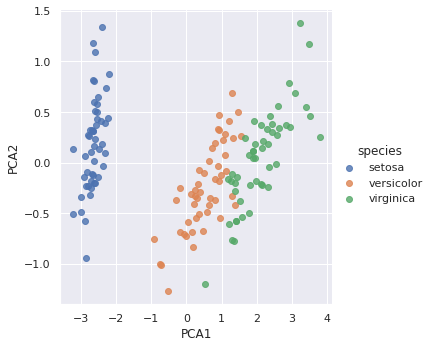

In [19]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

We can see that in this two-dimensional representation of the data, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels! This indicates that a relatively straightforward classification will probably be effective on the dataset, as we saw before.

### Unsupervised learning: Iris clustering

Let's next take a look at clustering the Iris data. A clustering algorithm attempts to find distinct groups of data without any prior knowledge about any labels. Here we will use a clustering method called Gaussian Mixture Model (GMM), which attempts to model the data as a collection of Gaussian blobs.

We can fit the GMM as follows:

In [20]:
from sklearn.mixture import GaussianMixture as GMM      # 1. Choose the model class
model = GMM(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster label

As we did previously, we will add the cluster label to the Iris `DataFrame` and use Seaborn to plot the results:

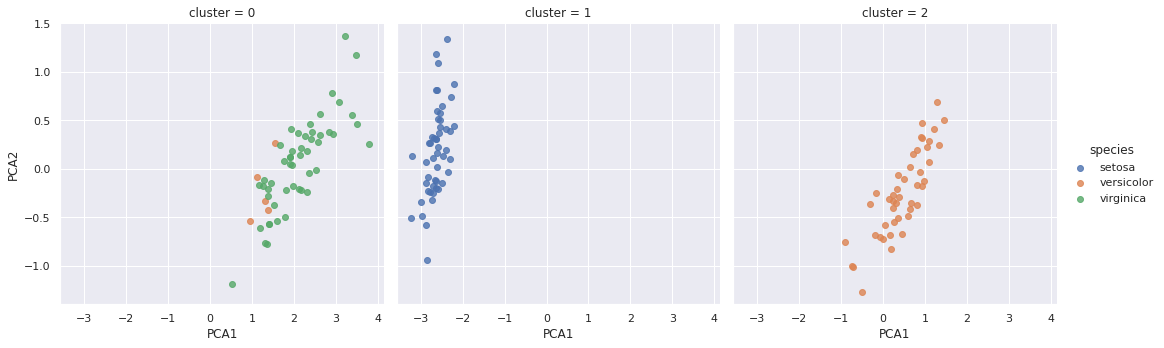

In [21]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

By splitting the data by cluster number, we can see exactly how well the GMM has recovered the underlying label: the _setosa_ species is separated perfectly within cluster 0, while there remains a small amount of mixing between _versicolor_ and _virginica_.

## Application: Exploring Hand-written Digits

Let's demonstrate these principles on a more interesting problem: optical character recognition applied to the identification of hand-written digits.

### Loading and visualizing the digits data

We'll use the Scikit-Learn data access interface to load this data:

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array: 1797 samples each consisting of an $8 \times 8$ grid of pixels. Let's visualize the first hundred of these:

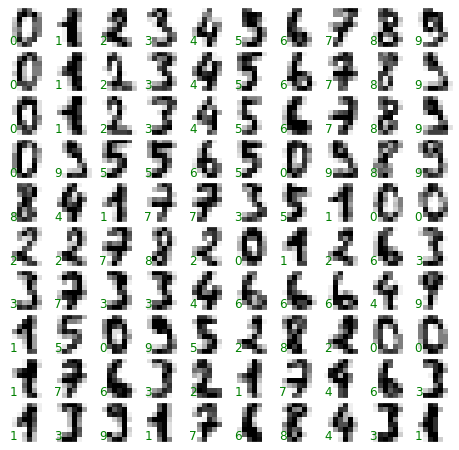

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

Once again, we need the input data to be two-dimensional, with a `[n_samples, n_features]` representation. We can achieve this by flattening the pixel arrays so that we have a length-64 array of pixel values representing each digit. We can access both the data and the target quantities through the `data` and `target` attributes:

In [24]:
X = digits.data
X.shape

(1797, 64)

In [25]:
y = digits.target
y.shape

(1797,)

### Unsupervised learning: Dimensionality reduction

We would like to visualize the points within the 64-dimensional parameter space. To achieve this, we'll reduce the dimensions to 2 using an unsupervised method called _Isomap_:

In [26]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

We can now plot this representation of the data to see if we can learn anything from its structure:

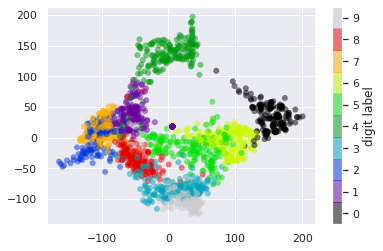

In [27]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

This plots gives us some insight on how well the different classes are separated in the larger 64-dimensional space. Overall, we can see that the different groups appear to be fairly well separated in the parameter space, so even a very straightforward supervised classification algorithm should achieve suitable results on this data.

### Classification on digits

Lastly, we will apply a classification algorithm to the digits. As with the Iris data, we will split the data into a training and test set, and fit a Gaussian Naive Bayes model:

In [28]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [29]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

With the model trained and its predictions at hand, we can gauge its accuracy by comparing the true values of the test set to the predictions:

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

We can see that, as we imagined from the visualization above, even this extremely simple model performs relatively well, reaching above 80% accuracy for the classification of the digits. However, this number doesn't tell the full story: we can't know for sure _where_ the classification has gone wrong. A nice way to do this, however, is to use the _confusion matrix_, which we can compute with Scikit-Learn and plot with Seaborn:

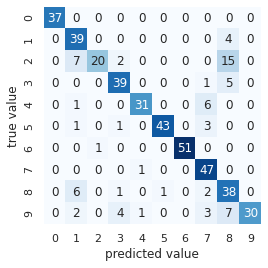

In [31]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true value');

This shows where the mis-labeled points are: we can see that a large number of twos are misclassified as either ones or eights. Another way to gain intuition into the characteristics of the model is to plot the inputs again, this time highlighting in red the incorrect labels:

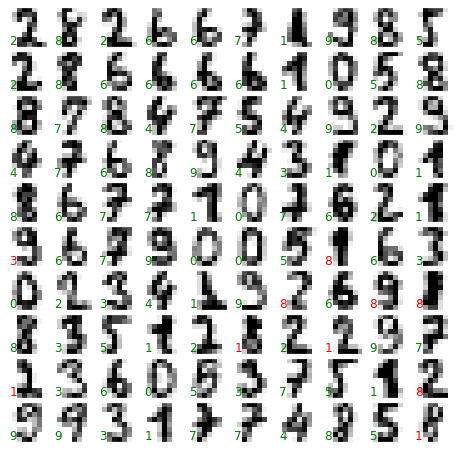

In [32]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')